<a href="https://www.kaggle.com/code/folayandunsin/a-brief-study-of-billonaires?scriptVersionId=146579249" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

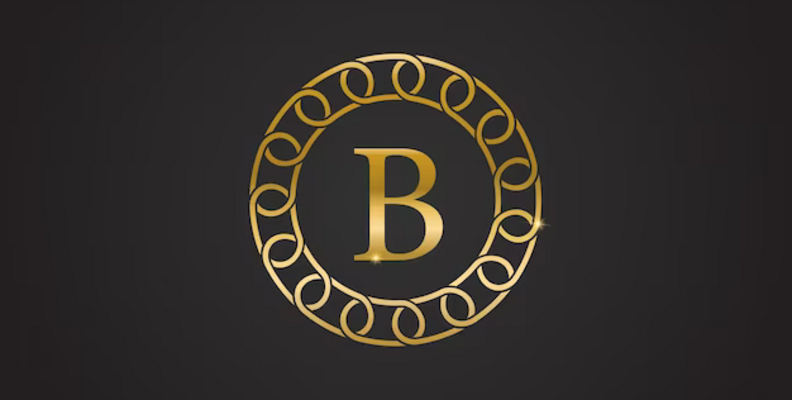

<center>
<h1>A study into the world of billonaires</h1>
<h3>Billonaires statistics dataset</h3>

This dataset contains statistics on the world's billionaires, including information about their businesses, industries, and personal details. It provides insights into the wealth distribution, business sectors, and demographics of billionaires worldwide.
    
</center>


# Key Features

## Import dataset

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/kaggle/input/billionaires-statistics-dataset/Billionaires Statistics Dataset.csv')
# view the first 10 rows

In [2]:
##explore column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [3]:
df.date.value_counts()

date
4/4/2023 5:01    2638
4/4/2023 9:01       2
Name: count, dtype: int64

# clean dataset

In [4]:
# convert gdp_country to float datatype
df['gdp_country'] = df['gdp_country'].str.replace("$","")
df['gdp_country'] = df['gdp_country'].str.replace(",","")

In [5]:
df['gdp_country'] = df['gdp_country'].str.strip()
df['gdp_country'] = df['gdp_country'].astype(float)

In [6]:
# create copy of dataset
df_copy = df.copy()

In [7]:
# select needful columns
necessary_columns = ['rank','gender','finalWorth','personName','category','age','country','countryOfCitizenship','gdp_country',
                    'city','source','industries','selfMade','status','latitude_country','longitude_country','life_expectancy_country','population_country','tax_revenue_country_country','total_tax_rate_country','cpi_country','cpi_change_country']


In [8]:
# select the columns to be used in the dataset
df_copy = df_copy[necessary_columns]


In [9]:
## convert finalworth column values to billions
df_copy['finalWorth'] = df_copy['finalWorth'].apply(lambda x: 1000000*x)

# Demographic analysis

## Gender demographics of billonaires



In [10]:
fig1 = px.histogram(df_copy, x= 'rank',y= 'finalWorth',color='gender',title='Distribution of Networth by rank and gender')
fig1.update_xaxes(title='Rank')
fig1.update_yaxes(type='log',title='final worth(log scale)')
fig1.show()

In [11]:
fig2 = px.histogram(df_copy, x = 'rank',color = 'gender', title = 'Number of billonaires by rank and gender')
fig2.update_xaxes(title='rank')
fig2.update_yaxes(title='count')
fig2.show()

In [12]:
fig3 = px.histogram(df_copy, x = df_copy.gender.value_counts().index, y = df_copy.gender.value_counts().values,
                    title = 'Distribution of wealth by gender')
gender_counts = df['gender'].value_counts()

fig3 = px.pie(gender_counts, labels=gender_counts.index, values=gender_counts.values,
              title="Gender Distribution of Billionaires",
              color_discrete_sequence=px.colors.qualitative.Plotly)
fig3.update_traces(marker=dict(line=dict(color='white', width=2)))
fig3.update_layout(showlegend=False)  
fig3.update_traces(hole=0.4) 

gender_labels = gender_counts.index
fig3.add_annotation(
    text="<b>Gender</b>",
    x=0.5,
    y=0.5,
    showarrow=False,
    font=dict(size=15),
)
fig3.add_annotation(
    text=gender_labels[0],
    x=0.2,
    y=0.75,
    showarrow=False,
    font=dict(size=12),
)
fig3.add_annotation(
    text=gender_labels[1],
    x=0.8,
    y=0.75,
    showarrow=False,
    font=dict(size=12),
)

fig3.show()

<left>
    
    So many things come to notice when we visualize the distribution of wealth by Rank and gender. 
    Most notable is that the sum of the top hundred most wealthy people is over three times the sum of the next hundred. This trend does not continue though as the amount of wealthn in each category exponentially declines the farther away it gets.
    Wealth controlled by the men is at least five times the sum of wealth controlled by their female counterparts. One plausible explanation to this is that they are less represented in the total population of the wealthy making up less than 13% of the given population.
</left>

## Age demographics of billonaires

### Violin Plot: Age distribution by gender

In [13]:
fig = px.violin(df_copy, x="gender", y="age", title="Age Distribution of Billionaires by Gender",
              color_discrete_sequence=['#FFA15A', '#00B2E2'], box = True,color = 'gender')
fig.update_xaxes(title="Gender")
fig.update_yaxes(title="Age")
fig.show()

<left>

    As at the collection of this dataset which is April, 2023, our billonaires fall basically into very similar age groups across both genders. With the first quartile (first 25% of dataset) in the mid 50's and the last quartile( last 75% of dataset) in their mid 70's. This points to the fact that these billonaires are middle aged( mostly between their mid 50's and mid 70's). Most interesting is that these ages are not gender specific. 



</left>


### Histogram plot: Distribution of wealth by age and gender 

In [14]:
fig1 = px.histogram(df_copy, x = 'age', y = 'finalWorth', color = 'gender', title = "Distribution of billonaires' networths by age and gender")
fig1.update_xaxes(title='Age')
fig1.update_yaxes(title='Networth', type = 'log')
fig1.show()

fig2 = px.histogram(df_copy, x = 'age', color = 'gender', title = 'Distribution of billonaires by age and gender')
fig2.update_xaxes(title='Age')
fig2.update_yaxes(title='Count')
fig2.show()
# scroll to view

<left>


    This goes on to corrobate the previous deduction from the violin plot above. The histogram plot of fig2 shows a unimodal distribution of billonaires at the age of 60. 
    While there are a few billonaires that are much younger, this is not the norm. The data shows the present crop of billonaires were mostly born at least 40 years ago i.e at least from the 1980s (gen X).
    



</left>

## Geospatial analysis

In [15]:

scale = 4e9
fig5 = go.Figure(data=go.Scattergeo(
    lon=df_copy["longitude_country"],
    lat=df_copy["latitude_country"],
    text=df_copy["personName"]+'<br>Networth ' + (df_copy['finalWorth']/1e9).astype(str)+' Billion'
    +'<br>'+df_copy['country'],
    mode="markers",
    marker=dict(
        size=df_copy['finalWorth']/scale,
        opacity=0.6,
        color=df_copy["finalWorth"],  
        colorscale="Rainbow",    
        colorbar=dict(title="Networth in billions")
    )
))
fig5.update_geos(projection_type="natural earth")
fig5.update_layout(title="Billionaires' Distribution on World Map")
fig5.show()


<left>
    
    The world's wealthiest are heavily concentrated mostly in Northern America and Europe and Minor Asia. It does appear though that Europe has the higher number of wealthier billonaires than North America. 
    It's apparent that in the other continents (Africa, Australia and South America), not a single individual has approached the 50 billion dollar mark. 
    
</left>

# Wealth distribution analysis

## Distribution of billonaires by country (top 10)

In [16]:
countries_grouped = df_copy.groupby(['country'])['finalWorth'].sum()
countries_grouped = countries_grouped.nlargest(10)

In [17]:
countries = df_copy.country.value_counts().head(10)

fig_country = px.bar(countries, y = countries.index, x= countries.values,
                     title = "Number of billonaires by country (top 10)",
                     color_discrete_sequence=px.colors.qualitative.Set3, 
                    )
fig_country.update_xaxes(title="Country")
fig_country.update_yaxes(title="Number of Billionaires")
fig_country.show()

countries_grouped_20 = countries_grouped.nlargest(20)
fig_country_1 = px.bar(countries_grouped_20, y = countries_grouped_20.index,x= countries_grouped_20.values,
                     title = "Sum of billonaires networth by country (top 20)",
                     color_discrete_sequence=px.colors.qualitative.Set3)
fig_country_1.update_xaxes(title="Country")
fig_country_1.update_yaxes(title="Sum of networth")
fig_country_1.show()

<left>

    The distribution of wealth among these countries is noticeable unequal. While the first two countries have the numbers of billonaires up and above the five hundreds, the remainder countries apparently have billonaires in the hundreds with some struggling to do so.
    The number of billonaires in these countries correlates with the amount of wealth produced in said countries to an extent. It also does appear that the number of billonaires in the top 10 correlates with the sum of their wealth just upto an extent. While the first three countries: United States, China and India are secured in their positions as top three, the remainder seven do not. As we see that they struggle to retain their positions. 
    Notable is that France which does not appear at all in the upper chart comes from below the top ten to fourth place in the lower one.
    
</left>

## Wealth distribution by industry

### Treemap: Wealth Distribution by Industry

In [18]:
fig7 = px.treemap(df_copy, path=['industries'], values='finalWorth',
                  title='Wealth Distribution by Industry',
                  color_discrete_sequence=px.colors.qualitative.Set1)
fig7.update_traces(textinfo="label+percent entry")
fig7.update_layout(margin=dict(t=50, l=0, r=0, b=0))
fig7.show()

<left>

    While the treemap above does show how the various industries compare the relative percentages of the sum of the billonaires networths, it does not tell exactly the relative percentages of the number of billonaires in these sectors.
    Top five industries with trillion dollar figures are: Technology, Fashion & Retail, Finance & Investments, Manufacturing, and Food & Beverage. 
    
    
    
</left>

# Economical Indicators

In [19]:
# Create a list of economical factors
factors = ['gdp_country','life_expectancy_country','population_country','tax_revenue_country_country',
           'total_tax_rate_country','cpi_country','cpi_change_country']
# Create a subset of the data using these factors:
sub_country = df_copy[factors + ['country','finalWorth']]
## group the data of the sum of the networth of each billonaire by country 
country_wealth_group = sub_country.groupby(['country'])['finalWorth'].sum()
## find the country's average economic conditions and group by country  
country_stats = sub_country.groupby(['country'])[factors].mean()
##top twenty
Top_twenty = country_wealth_group.nlargest(20)
country_stats = country_stats.nlargest(20,'gdp_country')


In [20]:
# plot scatter graphs of factors against finalworth
# We define a function that takes the number of countries we want to visualize and compares the sum of the billonaires networth in them against
## the economic conditions of the country
def plot_multiple_charts(num):
    top_numbers = country_wealth_group.nlargest(num)
    country_stats = sub_country.groupby(['country'])[factors].mean()
    for factor in factors:
        country_stats = country_stats.nlargest(num,factor)
        x = top_numbers
        y = country_stats
        fig = px.scatter(x = x, y = y[factor], title = "country's wealthiest vs. "+str(factor))
        fig.update_xaxes(type = 'log', title = "sum total of billonaires' final Worth")
        fig.update_yaxes(type = 'log', title = str(factor))
        fig.show()
    

In [21]:
plot_multiple_charts(100)
#scroll down to view other charts

We see that by plotting the sum of the billonaires networth(finalWorth) in these countries against the other economic factors they appear to be positively  correlated. These factors seem to play a major factor in determining how much wealth people living in such countries can accumulate. These conditions such as cpi_change, cpi, population,GDP, life expectancy go a large extent in deciding the economic climate of the country.

## Line bar combination

In [22]:
x = Top_twenty
y = country_stats
fig6 = px.scatter(x, title = "Billonaire by country's gdp",)
#fig6.update_yaxes(type = 'log')
fig6.add_trace(go.Bar(x=y.index, y=y.gdp_country, name ='country gdp'))
fig6.update_yaxes(type='log', title = 'log (value)')
fig6.show()

This line-bar chart further emphasizes the point made earlier: The higher the economic activity and output, the higher the wealth available for accumulation.

# Self-made vs. inherited wealth

In [23]:
self_made_count_df = df_copy.groupby(['gender','selfMade'])['finalWorth'].count()
self_made_count_df

gender  selfMade
F       False        241
        True          96
M       False        587
        True        1716
Name: finalWorth, dtype: int64

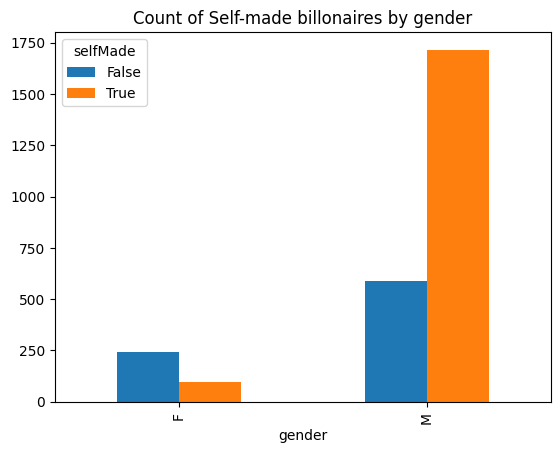

In [24]:
self_made_count_df.unstack().plot(kind='bar', stacked = False, title = "Count of Self-made billonaires by gender",
                                 );

    The distribution of self-made billonaires again behaves differently for the sexes. Before we proceed, we need to clarify who a self-made billonaire is. A self-made billonaire is one that builds their wealth on their own without the assistance of an inheritance. 
    We see here that in the male category, the number of self-made billonaires is over three times the number of their other male counterparts. However, the reverse is the case for the female category. Here we see that the females who inherited part of their wealth are twice the number of their female counterparts that are self-made.
    This is to say that male billonaire is much more likely to be self-made, while a female billonaire is much more likely to have inherited her wealth.